In [ ]:
Q 1) What is Boosting in Machine Learning?
>>  an iterative ensemble technique in machine learning that converts multiple weak learners (models slightly better than random chance) into a single
    highly accurate strong learner.

In [ ]:
Q 2) How does Boosting differ from Bagging
>> Bagging (Bootstrap Aggregating) trains models in parallel on different data samples to reduce variance (overfitting),
   combining predictions by averaging;

In [ ]:
Q 3) What is the key idea behind AdaBoost?
>>  to combine multiple "weak learners" (typically simple decision stumps) sequentially into a single "strong learner"

In [ ]:
Q 4) Explain the working of AdaBoost with an example
>> combines multiple "weak learners" (models that perform slightly better than random guessing) to create a single, robust "strong learner"

In [ ]:
Q 5) What is Gradient Boosting, and how is it different from AdaBoost?
>> Unlike AdaBoost, which adjusts data point weights to focus on misclassified samples, Gradient Boosting fits new models to the remaining errors
   using gradient descent, making it more robust and flexible for complex datasets. 

In [ ]:
Q 6) What is the loss function in Gradient Boosting?
>> measures the discrepancy between predicted and actual values,

In [ ]:
Q 7) How does XGBoost improve over traditional Gradient Boosting
>>  introducing built-in L1/L2 regularization to prevent overfitting, parallelized tree construction for significantly faster training, 
     and advanced tree pruning methods.

In [ ]:
Q 8) What is the difference between XGBoost and CatBoost?
>> CatBoost excels with categorical data (no preprocessing needed, better defaults) and symmetric trees for stability, while XGBoost offers deeper 
   control, faster training on large numerical datasets with leaf-wise growth, and strong regularization for peak performance, though often requiring 
   more tuning

In [ ]:
Q 9) What are some real-world applications of Boosting techniques?
>> fraud detection, credit risk scoring, customer churn prediction, medical diagnostics, and computer vision tasks like face detection

In [ ]:
Q 10) How does regularization help in XGBoost
>> adding penalties to the model's objective function, which reduces variance and prevents overfitting, leading to better generalization on unseen data.

In [ ]:
Q 11) What are some hyperparameters to tune in Gradient Boosting models?
>>  learning rate (controls step size, typically 0.01–0.3), n_estimators (number of trees), and max_depth (tree complexity). 

In [ ]:
Q 12) What is the concept of Feature Importance in Boosting?
>> assigns scores to input features based on their contribution to reducing prediction error across trees.

In [ ]:
Q 13) Why is CatBoost efficient for categorical data?
>> it natively handles categorical features using an innovative "Ordered Target Encoding" technique, which converts categories into numerical values
   based on historical data without causing target leakage or overfitting

# PRACTICAL

In [ ]:
Q 14) Train an AdaBoost Classifier on a sample dataset and print model accuracy

In [1]:
 import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=100, n_features=20, n_informative=15,
                           n_redundant=1, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost_clf.fit(X_train, y_train)

y_pred = adaboost_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.5667


In [ ]:
Q 15) Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
import numpy as np

X, y = make_regression(n_samples=1000, n_features=20, noise=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_reg = AdaBoostRegressor(random_state=42)
adaboost_reg.fit(X_train, y_train)

y_pred = adaboost_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 80.82101041574373


In [ ]:
Q 16) Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

importances = gbc.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances (Gradient Boosting):")
print("-" * 45)
print(feature_imp_df.head(10).to_string(index=False))


Top 10 Feature Importances (Gradient Boosting):
---------------------------------------------
             Feature  Importance
 mean concave points    0.450528
worst concave points    0.240103
        worst radius    0.075589
     worst perimeter    0.051408
       worst texture    0.039886
          worst area    0.038245
        mean texture    0.027805
     worst concavity    0.018725
     concavity error    0.013068
          area error    0.008415


In [ ]:
Q 17) Train a Gradient Boosting Regressor and evaluate using R-Squared Score

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R-squared Score: 0.9037
Mean Squared Error: 1621.8779


In [ ]:
Q 18) Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"XGBoost Classifier Accuracy: {xgb_accuracy:.4f}")
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.4f}")

print(f"\nComparison:")
if xgb_accuracy > gb_accuracy:
    print("XGBoost performed better in this specific run.")
elif gb_accuracy > xgb_accuracy:
    print("Gradient Boosting performed better in this specific run.")
else:
    print("Both models achieved the same accuracy in this specific run.")


In [ ]:
Q 19) Train a CatBoost Classifier and evaluate using F1-Score

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from catboost import CatBoostClassifier, Pool

# 1. Load and prepare the data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


cat_features = []


model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    eval_metric='F1', 
    random_seed=42,
    verbose=0,
    early_stopping_rounds=10 
)

model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))

print("Model training complete.")

y_pred = model.predict(X_test)



f1 = f1_score(y_test, y_pred)
print(f"\nF1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
Q 20) Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


X = np.random.rand(100, 5)  
y = (X @ np.array([1, 2, 3, 4, 5])) + np.random.normal(0, 0.1, 100) # Target variable with some noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)

print("Training the XGBoost model...")
reg.fit(X_train, y_train)
print("Training complete.")

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

In [ ]:
Q 21) Train an AdaBoost Classifier and visualize feature importance

Accuracy: 1.0000


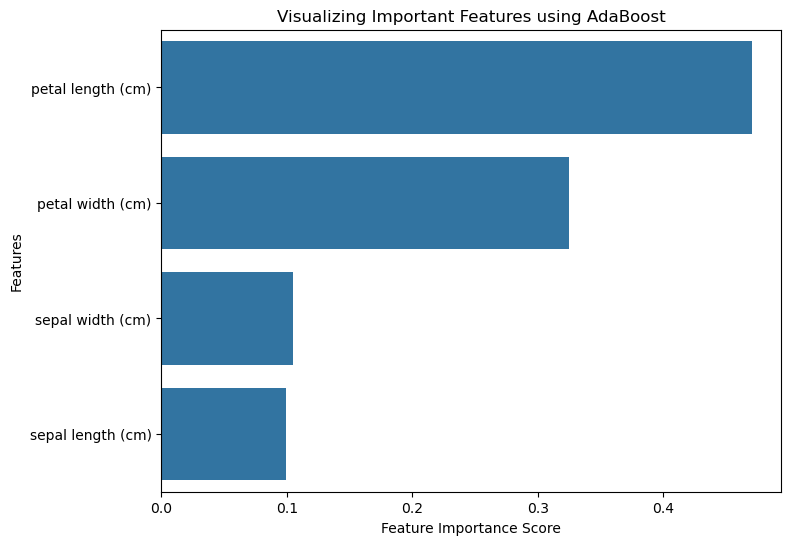

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


abc = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

importances = model.feature_importances_
feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features using AdaBoost")
plt.show()

In [ ]:
Q 22) Train a Gradient Boosting Regressor and plot learning curves

Mean Squared Error (MSE) on test set: 2994.8115


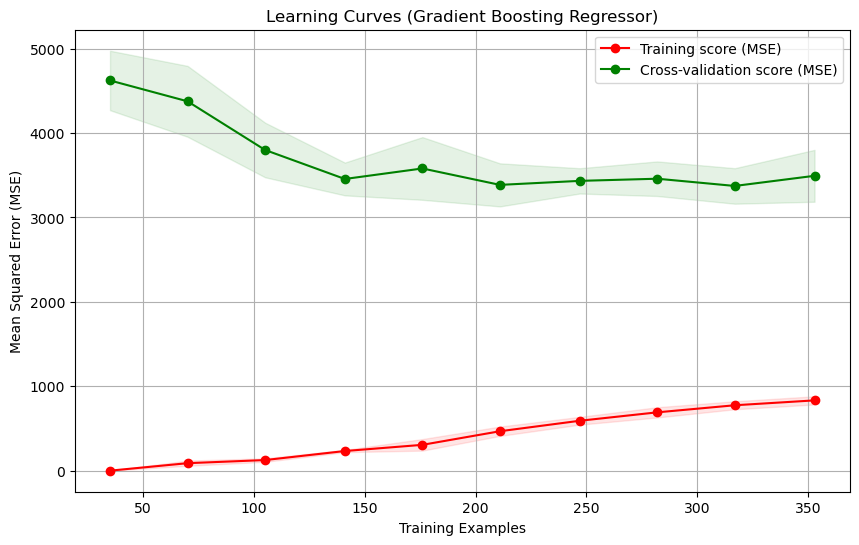

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


params = {
    'n_estimators': 500,
    'max_depth': 4,
    'min_samples_split': 2,
    'learning_rate': 0.01,
    'loss': 'squared_error',
    'random_state': 42
}
gbr = GradientBoostingRegressor(**params)

gbr.fit(X_train, y_train)

mse = mean_squared_error(y_test, gbr.predict(X_test))
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")


train_sizes, train_scores, test_scores = learning_curve(
    estimator=GradientBoostingRegressor(**params),
    X=X, y=y,
    cv=5, 
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), 
    n_jobs=-1 
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curves (Gradient Boosting Regressor)")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score (MSE)")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score (MSE)")

plt.legend(loc="best")
plt.show()

In [ ]:
Q 23) Train an XGBoost Classifier and visualize feature importance

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance

dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

print("Visualizing feature importance using plot_importance function:")
plot_importance(model)
plt.title("Feature Importance (Built-in Plot_importance)")
plt.show()

print("Visualizing feature importance manually:")
importance_scores = model.feature_importances_
feature_names = dataset.feature_names

sorted_idx = importance_scores.argsort()
top_n = 10
sorted_idx = sorted_idx[-top_n:]

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importance_scores[sorted_idx])
plt.xlabel("XGBoost Feature Importance Score")
plt.ylabel("Features")
plt.title(f"Top {top_n} Features Importance (Manual Plot)")
plt.show()

In [ ]:
Q 24) Train a CatBoost Classifier and plot the confusion matrix

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)


model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass', verbose=0)
model.fit(train_pool)

y_pred = model.predict(X_test)
y_pred_flat = y_pred.flatten()

accuracy = accuracy_score(y_test, y_pred_flat)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred_flat)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

In [ ]:
Q 25) Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

Training AdaBoost Classifiers...
Estimators: 10, Accuracy: 0.7933


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Estimators: 50, Accuracy: 0.8367


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Estimators: 100, Accuracy: 0.8333


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Estimators: 200, Accuracy: 0.8533


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Estimators: 500, Accuracy: 0.8700


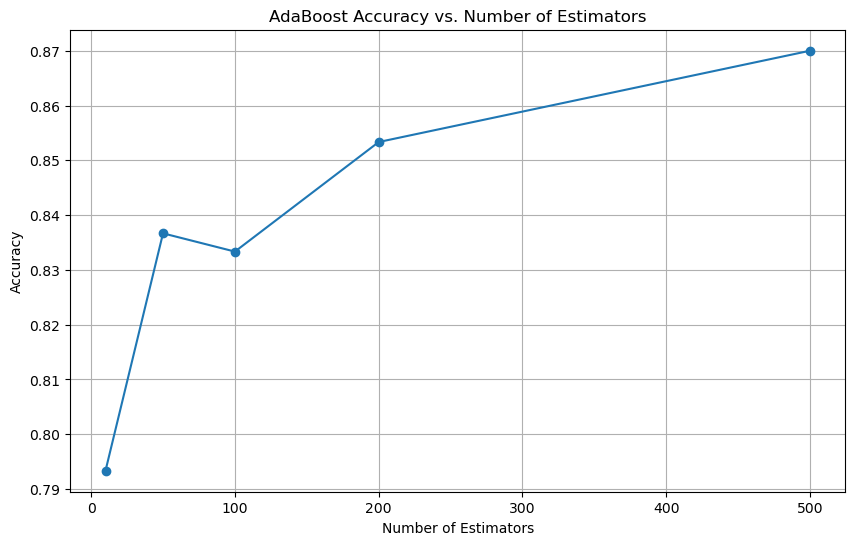

In [12]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_list = [10, 50, 100, 200, 500]
accuracies = []

print("Training AdaBoost Classifiers...")
for n in n_estimators_list:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42, algorithm='SAMME')
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Estimators: {n}, Accuracy: {acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='-')
plt.title('AdaBoost Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
Q 26) Train a Gradient Boosting Classifier and visualize the ROC curve

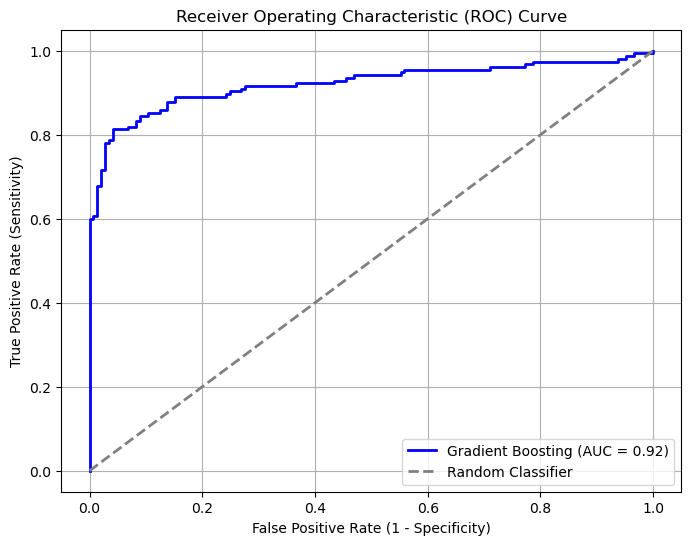

Area Under Curve (AUC): 0.9219


In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)


y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Gradient Boosting (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"Area Under Curve (AUC): {auc:.4f}")


In [ ]:
Q 29) Train an AdaBoost Classifier and analyze the effect of different learning rates

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5]
results = {}

plt.figure(figsize=(15, 8))

for i, lr in enumerate(learning_rates):
    
    ada = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        learning_rate=lr,
        random_state=42
    )
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[lr] = accuracy
    
    
    plt.subplot(2, 3, i+1)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', alpha=0.8, s=20)
    plt.title(f"LR={lr}, Acc={accuracy:.2f}")

plt.tight_layout()
plt.show()
print("Accuracies:", results)

In [ ]:
Q 30) Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
import xgboost as xgb


X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_informative=10, 
    n_redundant=5, 
    n_classes=5,  
    n_clusters_per_class=1, 
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


xgb_classifier = xgb.XGBClassifier(
    objective='multi:softprob', 
    num_class=5, 
    eval_metric='mlogloss', 
    use_label_encoder=False, 
    seed=42
)

print("Starting XGBoost training...")
xgb_classifier.fit(X_train, y_train)
print("Training complete.")


y_pred_proba = xgb_classifier.predict_proba(X_test)


test_log_loss = log_loss(y_test, y_pred_proba)

print(f"\nModel Evaluation:")
print(f"Log-Loss on Test Set: {test_log_loss:.4f}")
